In [ ]:
from omrdatasettools.Downloader import Downloader
from omrdatasettools.OmrDataset import OmrDataset
from omrdatasettools.MuscimaPlusPlusSymbolImageGenerator import MuscimaPlusPlusSymbolImageGenerator

The downloader module is used to extract the raw information about the datasets into the ./data folder

In [ ]:
downloader = Downloader()

In [ ]:
downloader.download_and_extract_dataset(OmrDataset.MuscimaPlusPlus_V2, "data/muscima_pp_v2")

The generated raw files are then used to draw the images of the dataset on canvases and store them in different folders.

In [ ]:
muscima_generator = MuscimaPlusPlusSymbolImageGenerator()
muscima_generator.extract_and_render_all_symbol_masks("./data/muscima_pp_v2/", "./data/muscima_pp_v2_symbols/")


Before training the models, the images first have to be resized to be a standard size.

First, let's find out what the max height and width is, and use those values to resize all the images

In [ ]:
from PIL import Image
import os

# Specify the root folder containing your images
root_folder = ".\\data\\muscima_pp_v2_symbols"

# Desired width to search for
desired_width = 861

# Initialize a list to store image file paths that match the desired width
matching_images = []

# Iterate through all subfolders and their images
for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)
            _, height = image.size
            if height == desired_width:
                matching_images.append(image_path)

# Print the paths of images with the desired width
if matching_images:
    print("Images with a width of 1153 pixels:")
    for image_path in matching_images:
        print(image_path)
else:
    print("No images with a width of 1153 pixels found.")

In [1]:
from PIL import Image
import os

# Specify the root folder containing subfolders with images
root_folder = ".\\data\\muscima_pp_v2_symbols"

# Initialize variables to store maximum width and height
max_width = 0
max_height = 0

# Iterate through all subfolders and their images to find maximum width and height
for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)
            width, height = image.size
            max_width = max(max_width, width)
            max_height = max(max_height, height)

# Iterate through all subfolders and their images again and pad them
for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)
            
            # Calculate padding dimensions
            padding_width = max_width - image.width
            padding_height = max_height - image.height
            
            # Create a new image with white padding
            padded_image = Image.new("RGB", (max_width, max_height), (255, 255, 255))
            
            # Calculate the position to paste the original image (centered)
            paste_x = padding_width // 2
            paste_y = padding_height // 2
            
            # Paste the original image onto the padded image
            padded_image.paste(image, (paste_x, paste_y))
            
            # Save the padded image, overwriting the original
            padded_image.save(image_path)

print("All images in subfolders have been resized to the maximum width and height.")

All images in subfolders have been resized to the maximum width and height.


At this stage, the images are quite large. To aid in training, we can reduce the size by 50%.

In [2]:
from PIL import Image
import os

# Specify the root folder containing the padded images
root_folder = ".\\data\\muscima_pp_v2_symbols"

# Initialize the output folder
output_root_folder = ".\\data\\muscima_pp_v2_symbols_resized"

# Create the output root folder if it doesn't exist
if not os.path.exists(output_root_folder):
    os.makedirs(output_root_folder)

# Specify the scale factor for resizing (50% in this case)
scale_factor = 0.5

# Iterate through all subfolders and their images
for foldername, subfolders, filenames in os.walk(root_folder):
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)

    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)

            # Calculate the new dimensions while preserving aspect ratio
            width, height = image.size
            new_width = int(width * scale_factor)
            new_height = int(height * scale_factor)

            # Resize the image
            resized_image = image.resize((new_width, new_height))

            # Save the resized image to the corresponding output subfolder
            output_path = os.path.join(output_folder, filename)
            resized_image.save(output_path)

print("All images in subfolders have been resized to 50% of their size while preserving aspect ratio and stored in corresponding output subfolders.")

All images in subfolders have been resized to 50% of their size while preserving aspect ratio and stored in corresponding output subfolders.


We can also try to supplement the dataset by rotating the images 10, -10, 15 and -15 degrees.

In [3]:
import os

root_folder = ".\\data\\muscima_pp_v2_symbols_resized"

output_root_folder = ".\\data\\muscima_pp_v2_symbols_resized_rotated"

# This list can be extended with more degrees as needed
rotate_degrees = [10, 15, -10, -15] 

for foldername, subfolders, filenames in os.walk(root_folder):
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)

            # Get image dimensions
            height, width = image.size

            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

            for degree in rotate_degrees:
                new_image = image.rotate(degree, fillcolor=(255, 255, 255))

                # Get the original file extension
                file_extension = os.path.splitext(filename)[-1]

                # Save the rotated image with a new filename in the output folder
                new_filename = filename.replace(file_extension, f"_rotated{degree}{file_extension}")
                new_image_path = os.path.join(output_folder, new_filename)
                new_image.save(new_image_path)

It may also be useful to randomly add images where some features are missing to the training dataset, to avoid overfitting.

In [18]:
from PIL import Image, ImageDraw
import random
import os

root_folder = ".\\data\\train"

output_root_folder = ".\\data\\train_cut"

for foldername, subfolders, filenames in os.walk(root_folder):
    x = 10  # Change this to the desired number of random numbers, i.e., the number of images to cut

    # Generate x random numbers between 0 and 99
    random_numbers = [random.randint(0, 99) for _ in range(x)]
    
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in filenames:
        if (filenames.index(filename) in random_numbers) and filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)

            # Get the dimensions of the image
            width, height = image.size
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

            # Create a new blank image with the same size and white background
            output_image = Image.new("RGB", (width, height), "white")

            # Create a draw object to manipulate the new image
            draw = ImageDraw.Draw(output_image)

            # Define the coordinates for the top half of the image
            top_half = (0, 0, width, height // 2)

            # Paste the top half of the input image onto the new image
            output_image.paste(image.crop(top_half))

            file_extension = os.path.splitext(filename)[-1]

            # Save the cut image with a new filename in the output folder
            new_filename = filename.replace(file_extension, f"_cut{file_extension}")
            new_image_path = os.path.join(output_folder, new_filename)
            # Save the resulting image
            output_image.save(new_image_path)

            # Close the input and output images
            image.close()
            output_image.close()
        else:
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

Salt and Pepper noise can also be added to a random selection of images.

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import random
import os

root_folder = ".\\data\\train_cut"

output_root_folder = ".\\data\\train_salt_and_pepper"

for foldername, subfolders, filenames in os.walk(root_folder):
    x = 10  # Change this to the desired number of random numbers, i.e., the number of images to cut

    # Generate x random numbers between 0 and 99
    random_numbers = [random.randint(0, 99) for _ in range(x)]
    
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in filenames:
        if (filenames.index(filename) in random_numbers) and filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

            # Convert the image to a numpy array for easy manipulation
            image_array = np.array(image)

            # Define the probability of adding salt and pepper noise
            noise_probability = 0.02  # You can adjust this value

            # Get the dimensions of the image
            height, width, channels = image_array.shape

            # Generate random noise
            for i in range(height):
                for j in range(width):
                    rand = random.random()
                    if rand < noise_probability / 2:
                        image_array[i, j] = [0, 0, 0]  # Pepper noise
                    elif rand < noise_probability:
                        image_array[i, j] = [255, 255, 255]  # Salt noise

            # Convert the numpy array back to an image
            noisy_image = Image.fromarray(image_array)

            file_extension = os.path.splitext(filename)[-1]

            # Save the cut image with a new filename in the output folder
            new_filename = filename.replace(file_extension, f"_salt_and_pepper{file_extension}")
            new_image_path = os.path.join(output_folder, new_filename)
            # Save the resulting image
            noisy_image.save(new_image_path)

            # Close the input and output images
            image.close()
            noisy_image.close()
        else:
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

Now the data is normalised, it is time to split the dataset and train the Convolutional Neural Network (CNN) and the Support Vector Machine (SVM).

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np

First we need to split the data into training, test and validation datasets.

In [17]:
import os
import shutil
import random

# Define the source folder containing subfolders with images
source_folder = ".\\data\\muscima_pp_v2_symbols_resized_rotated"

# Define the destination folders
train_folder = ".\\data\\train"
validation_folder = ".\\data\\validation"
test_folder = ".\\data\\test"

# Define the split ratios (80% train, 10% validation, 10% test)
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Iterate through subfolders in the source folder
for root, dirs, files in os.walk(source_folder):
    # Calculate the number of images to copy for each split
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    num_validation = int(num_files * validation_ratio)
    num_test = num_files - num_train - num_validation

    # Randomly shuffle the files in each subfolder
    random.shuffle(files)

    # Copy files to the destination folders based on the split ratios
    for i, file_name in enumerate(files):
        src_path = os.path.join(root, file_name)
        if i < num_train:
            dest_path = os.path.join(train_folder, root[len(source_folder) + 1:], file_name)
        elif i < num_train + num_validation:
            dest_path = os.path.join(validation_folder, root[len(source_folder) + 1:], file_name)
        else:
            dest_path = os.path.join(test_folder, root[len(source_folder) + 1:], file_name)

        # Ensure the destination directory exists
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)

        # Copy the file
        shutil.copy(src_path, dest_path)

print("Images have been split and copied to the train, validation, and test folders.")

Images have been split and copied to the train, validation, and test folders.


Now to make the image generators from the different folders

In [20]:
from PIL import Image
import numpy as np

# Define the path to your dataset directory
train_dir = '.\\data\\train_cut'
test_dir = '.\\data\\test'
validation_dir = '.\\data\\validation'


# Define the size of your input images
input_size = (344, 126)

# Define the batch size
batch_size = 32

# Define the number of classes in your dataset
num_classes = len(os.listdir(train_dir))
print(f"Number of classes: {num_classes}")

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an ImageDataGenerator for validation and test data (without augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and split the data into train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Number of classes: 35
Found 27082 images belonging to 35 classes.
Found 3341 images belonging to 35 classes.
Found 3359 images belonging to 35 classes.


First, let's build and compile the CNN model.

In [21]:
cnn = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(344, 126, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax') 
])

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])


After compilation, we can train the model using the test and validation sets. These results are then stored in cnn_history. After this, the model is evaluated using the test set.

In [1]:
import tensorflow as tf
print(tf.__version__)
print("cuDNN available:", tf.test.is_built_with_cuda())

# Check cuDNN version
print("cuDNN version:", tf.test.gpu_device_name())
tf.config.list_physical_devices('GPU')

2.13.0
cuDNN available: False
cuDNN version: 


[]

In [22]:
import wandb
from wandb.keras import WandbCallback

# start a new wandb run to track this script
wandb.init(project="Recognition of expressive symbols in handwritten sheet music")

wandb.config.epochs = 50
wandb.config.batch_size = batch_size


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Train the model
cnn_history = cnn.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stop, WandbCallback()]
)

cnn.summary()

#Evaluate the model using the test set
test_results = cnn.evaluate(test_generator)
print("Test loss:", test_results[0])
print("Test accuracy:", test_results[1])

Epoch 1/50
847/847 [==============================] - 617s 728ms/step - loss: 1.5031 - accuracy: 0.4623 - val_loss: 1.3029 - val_accuracy: 0.5163
Epoch 2/50
847/847 [==============================] - 619s 731ms/step - loss: 1.1796 - accuracy: 0.5270 - val_loss: 1.1876 - val_accuracy: 0.5163
Epoch 3/50
847/847 [==============================] - 580s 685ms/step - loss: 1.0454 - accuracy: 0.5640 - val_loss: 1.1401 - val_accuracy: 0.5403
Epoch 4/50
847/847 [==============================] - 674s 796ms/step - loss: 0.9721 - accuracy: 0.5847 - val_loss: 0.9155 - val_accuracy: 0.6040
Epoch 5/50
847/847 [==============================] - 649s 766ms/step - loss: 0.9014 - accuracy: 0.6063 - val_loss: 0.8135 - val_accuracy: 0.6399
Epoch 6/50
847/847 [==============================] - 623s 735ms/step - loss: 0.8647 - accuracy: 0.6183 - val_loss: 0.7791 - val_accuracy: 0.6540
Epoch 7/50
847/847 [==============================] - 629s 742ms/step - loss: 0.8302 - accuracy: 0.6292 - val_loss: 0.8009 -

After this, the model can be saved for later reference.

In [23]:
cnn.save('cnn_test4.h5')

C:\Users\Reuben\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


We can also use matplotlib to visualise the training progress by using the "cnn_history" variable to plot the training and validation accuracy and loss over time.

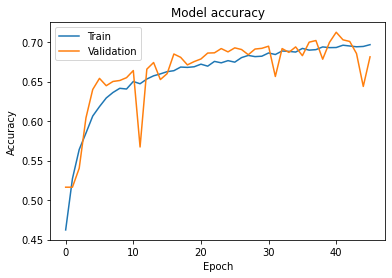

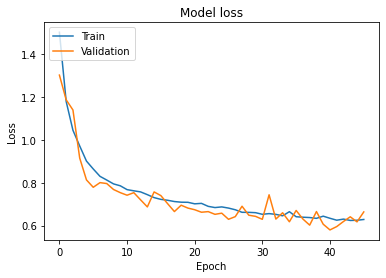

In [24]:
# Plot training & validation accuracy values
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()